## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [2]:
name='Demydova,Olena' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [30]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [31]:
df = pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')


### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [32]:
df.isna().value_counts() 

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

In [ ]:
#  None

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [33]:
print(df.dtypes)

sales    float64
month      int64
day        int64
year       int64
dtype: object


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [34]:
df['date'] = df['year']*10000+df['month']*100+df['day']*1 

In [35]:
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')

Change index to dates:

``` df.index=.... ```

In [36]:
df.index=df['date']

In [6]:
# 147,5

What is the size of the dataset?

use ```.shape```

In [37]:
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [38]:
df=df.drop(['day','year' ,'month','date'], axis=1)

What is the size of the dataset now?

In [39]:
df.shape

(147, 1)

In [32]:
# 147,1

<bound method NDFrame.describe of        sales
0    134.710
1    137.740
2    134.620
3    141.670
4    127.990
..       ...
142    1.656
143    2.074
144    1.584
145    1.508
146    1.235

[147 rows x 1 columns]>

### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [40]:
y=df['sales']

In [41]:
y=np.flip(y)

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

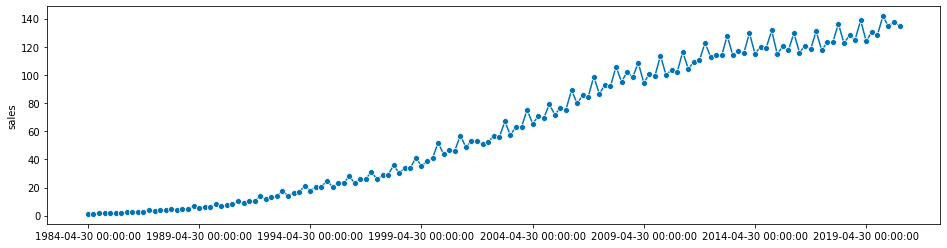

In [42]:
plot_series(y)

Plot the series using ```plot_series()```

In [ ]:
# code here (0.25 pt.)

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

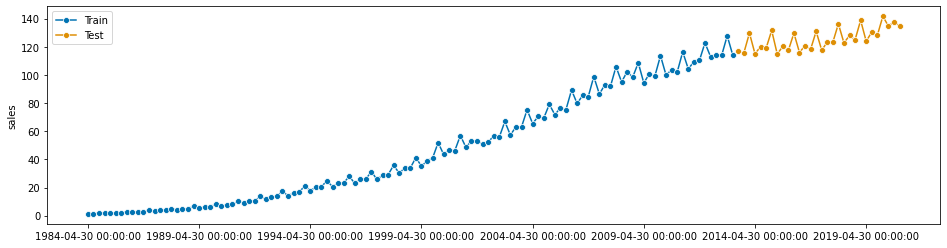

In [43]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=0.2)
plot_series(y_train, y_test, labels=['Train', 'Test']);

In [ ]:
plot train and test samples using ``` plot_series ```

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [44]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
model_MAA = ETSModel(y_train,error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA=model_MAA.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [45]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
model_AAM = ETSModel(y_train,error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_AAM=model_AAM.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [46]:
fit_MAA.forecast(steps=30)

2013-07-31    117.848870
2013-10-31    117.364671
2014-01-31    130.725436
2014-04-30    117.901780
2014-07-31    121.230477
2014-10-31    120.746277
2015-01-31    134.107043
2015-04-30    121.283386
2015-07-31    124.612083
2015-10-31    124.127884
2016-01-31    137.488649
2016-04-30    124.664993
2016-07-31    127.993690
2016-10-31    127.509490
2017-01-31    140.870256
2017-04-30    128.046600
2017-07-31    131.375296
2017-10-31    130.891097
2018-01-31    144.251863
2018-04-30    131.428206
2018-07-31    134.756903
2018-10-31    134.272704
2019-01-31    147.633469
2019-04-30    134.809813
2019-07-31    138.138510
2019-10-31    137.654310
2020-01-31    151.015076
2020-04-30    138.191419
2020-07-31    141.520116
2020-10-31    141.035917
Freq: Q-OCT, Name: simulation, dtype: float64

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [47]:
fit_AAM.forecast(steps=30)

2013-07-31    117.848870
2013-10-31    117.364671
2014-01-31    130.725436
2014-04-30    117.901780
2014-07-31    121.230477
2014-10-31    120.746277
2015-01-31    134.107043
2015-04-30    121.283386
2015-07-31    124.612083
2015-10-31    124.127884
2016-01-31    137.488649
2016-04-30    124.664993
2016-07-31    127.993690
2016-10-31    127.509490
2017-01-31    140.870256
2017-04-30    128.046600
2017-07-31    131.375296
2017-10-31    130.891097
2018-01-31    144.251863
2018-04-30    131.428206
2018-07-31    134.756903
2018-10-31    134.272704
2019-01-31    147.633469
2019-04-30    134.809813
2019-07-31    138.138510
2019-10-31    137.654310
2020-01-31    151.015076
2020-04-30    138.191419
2020-07-31    141.520116
2020-10-31    141.035917
Freq: Q-OCT, Name: simulation, dtype: float64

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

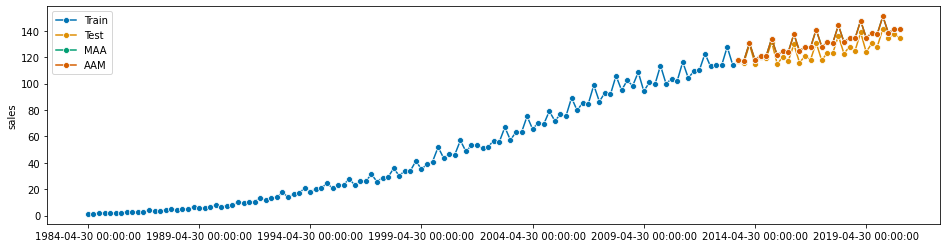

In [67]:
plot_series(y_train, y_test, fit_MAA.forecast(steps=30), fit_AAM.forecast(steps=30),labels=['Train', 'Test','MAA','AAM']);

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [54]:
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)
upper_int=pred_MAA.pi_upper
lower_int=pred_MAA.pi_lower

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

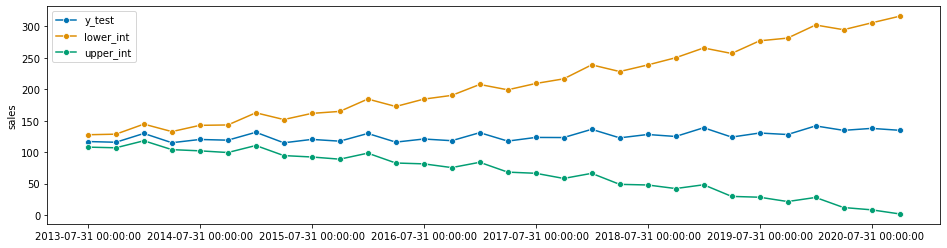

In [55]:
plot_series(y_test, upper_int, lower_int, labels =['y_test','lower_int','upper_int'])

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [59]:
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
upper_int=pred_AAM.pi_upper
lower_int=pred_AAM.pi_lower

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

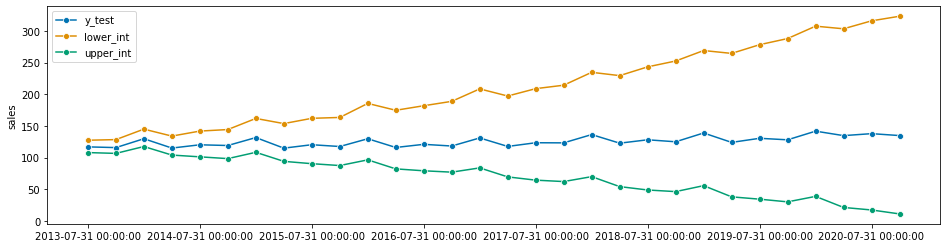

In [61]:
plot_series(y_test, upper_int, lower_int, labels =['y_test','lower_int','upper_int'])

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [83]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error
def mean_absolute_error(y_train, pred_MAA):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-83-7672ac7bf66c>, line 2)

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [23]:
# code here (0.5 pt.) MAA

In [24]:
# code here (0.5 pt.) AAM

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [25]:
# code here (0.5 pt.)

Calculate MAPE:

In [26]:
# code here (0.25 pt.) MAA

In [27]:
# code here (0.25 pt.) AAM

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [28]:
# code here (1 pt.)